In [64]:
import numpy as np 
import torch
import torch.nn.functional as F
from matplotlib import pyplot as plt 
from PIL import Image
 
from diffusers import DDPMPipeline


In [73]:
# Utils
def show_images(x):
    x=x*0.5+0.5
    grid=torchvision.utils.make_grid(x)
    grid_im=grid.detach().cpu().permute(1,2,0).clip(0,1)*255
    grid_im=Image.fromarray(np.array(grid_im).astype(np.uint8))
    return grid_im

def make_grid(images,size=64):
    output_im=Image.new('RGB',(size*len(images),size))
    for i,im in enumerate(images):
        output_im.paste(im.resize((size,size)),(i*size,0))
        
    return output_im
    
    

####  注意这里 DDPMPipeline.from_pretrained的使用方式,,,下一目录中放的是一个文件夹

In [66]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
butterfly_pipeline=DDPMPipeline.from_pretrained(
    "E:\Df_pretrain\ddpm-butterflies-32px"
).to(device)


<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\王\AppData\Local\Temp\ipykernel_27120\4018458374.py:3: SyntaxWarning: invalid escape sequence '\D'
  "E:\Df_pretrain\ddpm-butterflies-32px"


Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch E:\Df_pretrain\ddpm-butterflies-32px: Error no file named diffusion_pytorch_model.safetensors found in directory E:\Df_pretrain\ddpm-butterflies-32px.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [67]:
#create 8 imgs
images=butterfly_pipeline(batch_size=8).images

  0%|          | 0/1000 [00:00<?, ?it/s]

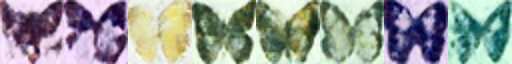

In [68]:
#view results
make_grid(images)

# Training

Repo card metadata block was not found. Setting CardData to empty.


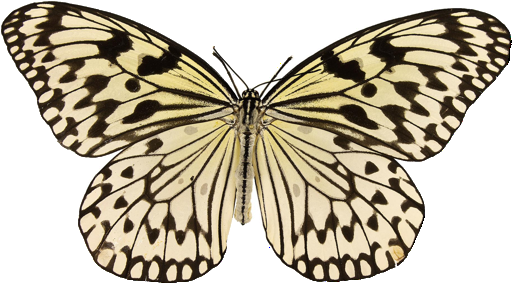

In [69]:
import torchvision


from torchvision import transforms
from datasets import load_dataset



dataset=load_dataset('huggan/smithsonian_butterflies_subset',split='train')

image_size=32
batch_size=64
len(dataset)

dataset[0]['image']

数据增强

In [70]:
preprocess = transforms.Compose(
    [
        transforms.Resize((image_size,image_size)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5],[0.5])
    ]
)
def transform(example):
    images=[preprocess(image.convert('RGB')) for image in example['image']]
    return {'images':images}

dataset.set_transform(transform)

train_dataloader=torch.utils.data.DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=True
)

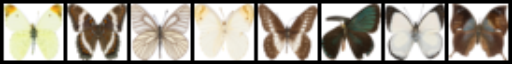

In [74]:

# grab a batch of images and visualize it
xb_visualize = next(iter(train_dataloader))["images"].to(device)[:8]   # torch.Size([64, 3, 32, 32])
show_images(xb_visualize).resize((8 * 64, 64), resample=Image.BILINEAR)